In [32]:
#Required imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
import pickle
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

In [2]:
data = pd.read_csv("C:/Prathamesh/Semester 6/IOT/Project/VIT_model/final_vit_dataset.csv")
data.head()

,Month_of_year,EB Units
0,01-01-2014,1516520
1,01-02-2014,1981919
2,01-03-2014,2276161
3,01-04-2014,3050992
4,01-05-2014,3103564


In [3]:
#This indicates that we need to convert the datatype of the values in the EB units columnn from object to float
# Removing commas from values in the column
data['EB Units'] = data['EB Units'].apply(str).str.replace(',', '')

# Convert the column to float data type using astype()
data['EB Units'] = data['EB Units'].astype(float)

print(data.dtypes)

Month_of_year     object
EB Units         float64
dtype: object


In [4]:
# Assuming your DataFrame is named "df" and the date column is named "ds"
data['Month_of_year'] = pd.to_datetime(data['Month_of_year'])

In [5]:
print(data.dtypes)

Month_of_year    datetime64[ns]
EB Units                float64
dtype: object


In [6]:
# Convert the "date" column to datetime data type using the original format
data['Month_of_year'] = pd.to_datetime(data['Month_of_year'], format='%d-%m-%Y')

# Convert the "date" column to a new format (yyyy-mm-dd)
data['Month_of_year'] = data['Month_of_year'].dt.strftime('%Y-%m-%d')

# Save the updated DataFrame back to a new CSV file
data.to_csv('vit_updated_file.csv', index=False)

In [7]:
df = pd.read_csv('vit_updated_file.csv')
df.head()

,Month_of_year,EB Units
0,2014-01-01,1516520.0
1,2014-01-02,1981919.0
2,2014-01-03,2276161.0
3,2014-01-04,3050992.0
4,2014-01-05,3103564.0


In [15]:
df['Month_of_year'] = pd.to_datetime(df['Month_of_year'])

In [27]:
print(df.dtypes)

Month_of_year    datetime64[ns]
EB Units                float64
dtype: object


In [28]:
new_df = df[["Month_of_year", "EB Units"]] 
new_df.rename(columns={"Month_of_year": "ds", "EB Units": "y"}, inplace=True)

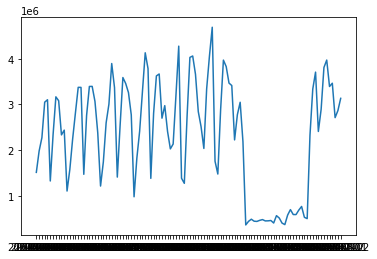

In [10]:
import matplotlib.pyplot as plt

plt.plot(data['Month_of_year'] , data['EB Units'])

In [11]:
pip install neuralprophet


Note: you may need to restart the kernel to use updated packages.

In [12]:
pip install --upgrade PyYAML


Requirement already up-to-date: PyYAML in c:\annaconda\lib\site-packages (6.0)
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install --ignore-installed PyYAML

  Using cached PyYAML-6.0-cp38-cp38-win_amd64.whl (155 kB)
Note: you may need to restart the kernel to use updated packages.Successfully installed PyYAML-6.0



In [30]:
from neuralprophet import NeuralProphet
import pandas as pd

#df = pd.read_csv('C:/Prathamesh/Semester 6/IOT/Project/VIT_model/final_vit_dataset.csv')

m = NeuralProphet()

metrics = m.fit(new_df, freq="M")

forecast = m.predict(new_df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 90.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 508
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number for the learning rate finder (208). The results might not be optimal.


Finding best initial lr:   0%|          | 0/208 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 90.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 90.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency D


Predicting: 7it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [33]:
pickle.dump(m, open('vit_model.pkl', 'wb'))